In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

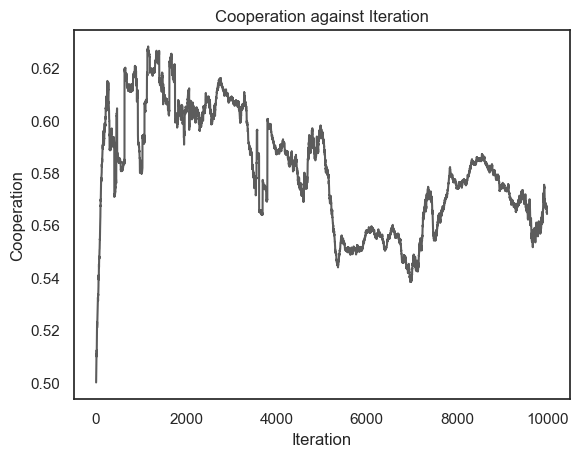

In [6]:
dataframe = pd.read_csv("previous/S_f_2_d_5.csv")
dataframe["Cooperation"] = (dataframe["PeerTransfer"] + dataframe["SubTransfer"]) / 2
dataframe["Cooperation"] = 0.5 + (dataframe["Cooperation"] - 0.5) / 2
 
sns.set_theme()
sns.set_style(style="white")
plt.figure()
 
sns.lineplot(data=dataframe, x="Iteration", y="Cooperation", color="#5c5c5c")
plt.title("Cooperation against Iteration")
plt.savefig("plots/cooperation.png")

In [63]:
def read_results_folder(folder):
    dataframes = []

    path = f"results/{folder}/"
    for file in os.listdir(path):
        data = pd.read_csv(path + file)

        # We are using the average values
        data = pd.DataFrame([data.mean()])

        # Parse the values from the filename
        parts = file.split(".")[0].split("_")
        data["Stress Scenario"] = 2 ** int(parts[2])
        data["Resource Degradation (%)"] = 5 * int(parts[4])
        data["Cooperation"] = (data["PeerTransfer"] + data["SubTransfer"]) / 2
        dataframes.append(data)

    return pd.concat(dataframes)

In [64]:
def filter_for_egalitarianism(dataframe):
    dataframe = dataframe.drop(2) # muddied data
    dataframe = dataframe.apply(lambda x: 1 / x) # get the Gini coefficient
    return dataframe

def filter_for_cooperation(dataframe):
    # cooperation was originally scaled to see small differences better
    dataframe["Cooperation"] = 0.5 + (dataframe["Cooperation"] - 0.5) / 4
    return dataframe

def plot_folder(dataframe, title, label, variable, filter, limits=[0.0, 1.0]):
    dataframe = filter(dataframe)
    dataframe = dataframe.pivot(index="Stress Scenario", columns="Resource Degradation (%)", values=variable)

    plt.figure()
    sns.heatmap(data=dataframe, cmap="YlGnBu", vmin=limits[0], vmax=limits[1])
    plt.title(title)
    # plt.gca().set_ylim(limits)
    # TODO: This is not good lmao
    plt.savefig("plots/" + variable.lower() + "/" + label + ".png")

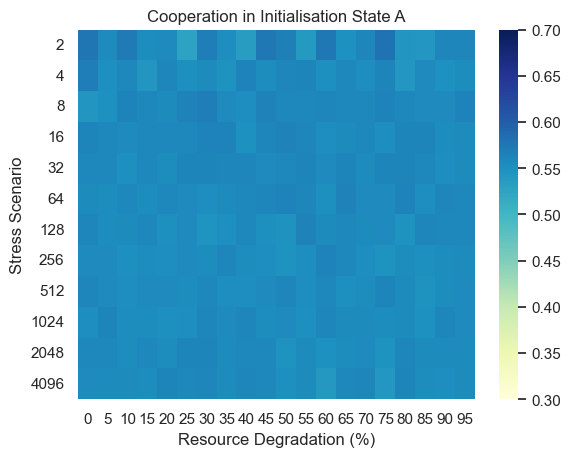

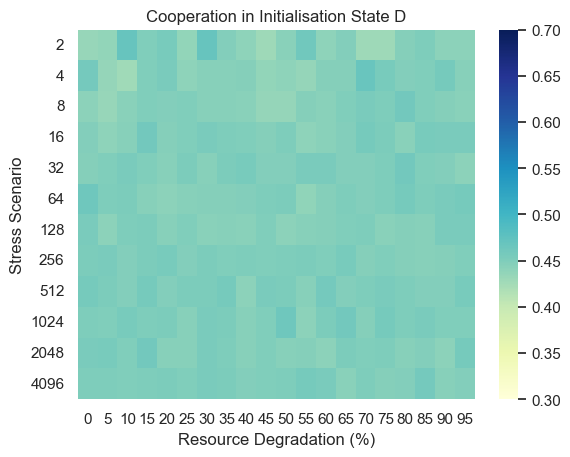

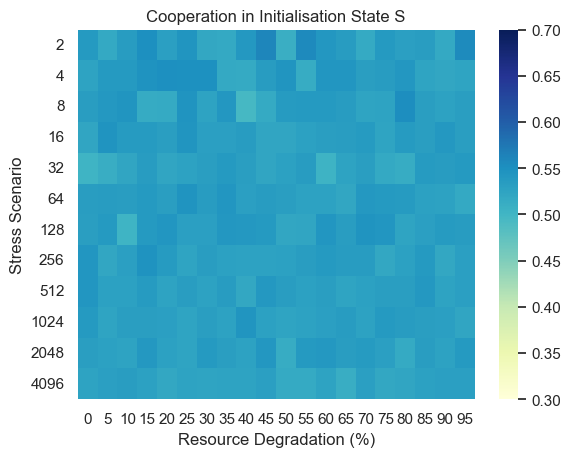

In [65]:
def plot_results():
    for folder in ["A", "D", "S"]:
        dataframe = read_results_folder(folder)
        # plot_folder(dataframe, f"Gini Coefficient in Initialisation State {folder}",
        #     folder, "Egalitarianism", filter_for_egalitarianism, limits=[0.42, 0.66])
        plot_folder(dataframe, f"Cooperation in Initialisation State {folder}",
            folder, "Cooperation", filter_for_cooperation, limits=[0.3, 0.7])

plot_results()
# read_results_folder("S")